In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, GRU, BatchNormalization, RepeatVector, TimeDistributed, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#import seaborn as sns

In [2]:
DATA_PATH = "DATA_P.json"


In [3]:
def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)
    path = np.array(data["path"])

    return path

In [4]:
def prepare_datasets(test_size, validation_size):
    
    # load data
    path = load_data(DATA_PATH)
    
    train, test = train_test_split(path , test_size=test_size)
    
    train, validation = train_test_split(train, test_size=validation_size)

    return train, validation, test

In [5]:
def plot_history(history):
    
    """ plot accuracy/loss for training/validation set as a function of the epochs"""

#     fig, axs = plt.subplots(2)

#     # create accuracy subplot

#     axs[0].plot(history.history["accuracy"], label="train accuracy")
#     axs[0].plot(history.history["val_accuracy"], label="test accuracy")
#     axs[0].set_ylabel("Accuracy")
#     axs[0].legend(loc="lower right")
#     axs[0].set_title("Accuracy eval")

#     # create error subplot

    plt.plot(history.history["loss"], label="train error")
    plt.plot(history.history["val_loss"], label="test error")
    plt.ylabel("Error")
    plt.xlabel("Epoch")
    plt.legend(loc="upper right")

    plt.savefig('Accuracy eval.png', dpi=100, bbox_inches='tight')
    plt.show()

In [8]:
def build_model(input_shape):

    # build network topology
    Autoencoder = Sequential()
    
    
    Autoencoder.add(Bidirectional(LSTM(128, input_shape=input_shape, return_sequences=True), input_shape=input_shape))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(LSTM(64, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(LSTM(32, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(LSTM(16)))
    Autoencoder.add(BatchNormalization())
    
    Autoencoder.add(RepeatVector(n = input_shape[0]))

    Autoencoder.add(Bidirectional(GRU(32, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(GRU(64, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(GRU(128, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    # dense layer
    Autoencoder.add(TimeDistributed(Dense(input_shape[1] , activation='relu')))

    return Autoencoder

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 20, 256)           134144    
_________________________________________________________________
batch_normalization_7 (Batch (None, 20, 256)           1024      
_________________________________________________________________
bidirectional_8 (Bidirection (None, 20, 128)           164352    
_________________________________________________________________
batch_normalization_8 (Batch (None, 20, 128)           512       
_________________________________________________________________
bidirectional_9 (Bidirection (None, 20, 64)            41216     
_________________________________________________________________
batch_normalization_9 (Batch (None, 20, 64)            256       
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 32)               


Epoch 00024: val_mean_squared_error did not improve from 0.00491
Epoch 25/100
316/316 [==============================] - 22s 71ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0700 - val_mean_squared_error: 0.0700

Epoch 00025: val_mean_squared_error did not improve from 0.00491

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
Epoch 26/100
316/316 [==============================] - 23s 74ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0292 - val_mean_squared_error: 0.0292

Epoch 00026: val_mean_squared_error did not improve from 0.00491
Epoch 27/100
316/316 [==============================] - 23s 74ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0072 - val_mean_squared_error: 0.0072

Epoch 00027: val_mean_squared_error did not improve from 0.00491
Epoch 28/100
316/316 [==============================] - 23s 73ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0240 - val_mean_squared_error

316/316 [==============================] - 23s 73ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0060 - val_mean_squared_error: 0.0060

Epoch 00058: val_mean_squared_error did not improve from 0.00304
Epoch 59/100
316/316 [==============================] - 22s 71ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0031 - val_mean_squared_error: 0.0031

Epoch 00059: val_mean_squared_error did not improve from 0.00304

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
Epoch 60/100
316/316 [==============================] - 22s 71ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0030 - val_mean_squared_error: 0.0030

Epoch 00060: val_mean_squared_error improved from 0.00304 to 0.00296, saving model to weights.h5
Epoch 61/100
316/316 [==============================] - 22s 70ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0030 - val_mean_squared_error: 0.0030

Epoch 00061: val_mean_squared_error 

316/316 [==============================] - 22s 71ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0043 - val_mean_squared_error: 0.0043

Epoch 00091: val_mean_squared_error did not improve from 0.00189
Epoch 92/100
316/316 [==============================] - 22s 71ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0024 - val_mean_squared_error: 0.0024

Epoch 00092: val_mean_squared_error did not improve from 0.00189
Epoch 93/100
316/316 [==============================] - 23s 71ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00093: val_mean_squared_error did not improve from 0.00189
Epoch 94/100
316/316 [==============================] - 22s 71ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00094: val_mean_squared_error did not improve from 0.00189
Epoch 95/100
316/316 [==============================] - 22s 71ms/step - loss: 0.0021 

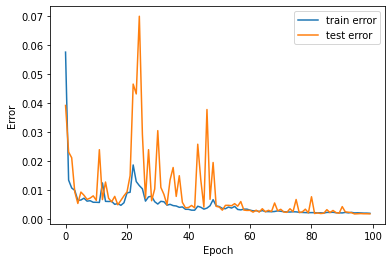

In [9]:

if __name__ == "__main__":
    
    # get train, validation , test splits
    train, validation, test = prepare_datasets(0.1, 0.1)
    
    np.save("test", test)

    # create network
    input_shape = (train.shape[1], train.shape[2])
    
    model = build_model(input_shape)

    # compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=[metrics.MeanSquaredError()])

    checkpoint_callback = ModelCheckpoint('weights.h5', monitor='val_mean_squared_error', verbose=1,
                                          save_best_only=True, mode='min')

    reducelr_callback = ReduceLROnPlateau(
        monitor='val_mean_squared_error', factor=0.7, patience=7, min_delta=0.0001,
        verbose=1
    )

    callbacks_list = [checkpoint_callback, reducelr_callback]

    model.summary()

    # train model
    history = model.fit(train, train, validation_data=(validation, validation), batch_size=32, epochs=100,
                        callbacks=callbacks_list)

    # plot accuracy
    plot_history(history)

    # evaluate model on test set
#     test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
#     print("\nTest Accuracy : ", test_acc)

